<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [35]:
##. If developing on a system with a single GPU, we can simulate multiple GPUs with virtual devices. 
## This enables easy testing of multi-GPU setups without requiring additional resources.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Create 2 virtual GPUs with 1GB memory each
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),
#          tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [36]:
##The best practice for using multiple GPUs is to use tf.distribute.Strategy.
## This program will run a copy of your model on each GPU, splitting the input data between them, 
## also known as "data parallelism".


# tf.debugging.set_log_device_placement(True)

# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
#   inputs = tf.keras.layers.Input(shape=(1,))
#   predictions = tf.keras.layers.Dense(1)(inputs)
#   model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
#   model.compile(loss='mse',
#                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.2))

In [37]:
# tf.debugging.set_log_device_placement(True)  #show GPU use

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [41]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
df[df.sqft_living.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [43]:
# test
import pandas as pd 
sr = pd.Series([11, 21, 8, 18, 65, None, 32, 10, 5, 24, None]) 

# Create the Index 
index_ = pd.date_range('2010-10-09', periods = 11, freq ='M') 

# set the index 
sr.index = index_ 

# Print the series 
print(sr) 
result = sr.isnull() 
print("--------.isnull()-------------")
print(result)
print("** sr.isnull().sum():",sr.isnull().sum())

2010-10-31    11.0
2010-11-30    21.0
2010-12-31     8.0
2011-01-31    18.0
2011-02-28    65.0
2011-03-31     NaN
2011-04-30    32.0
2011-05-31    10.0
2011-06-30     5.0
2011-07-31    24.0
2011-08-31     NaN
Freq: M, dtype: float64
--------.isnull()-------------
2010-10-31    False
2010-11-30    False
2010-12-31    False
2011-01-31    False
2011-02-28    False
2011-03-31     True
2011-04-30    False
2011-05-31    False
2011-06-30    False
2011-07-31    False
2011-08-31     True
Freq: M, dtype: bool
** sr.isnull().sum(): 2


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


[sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

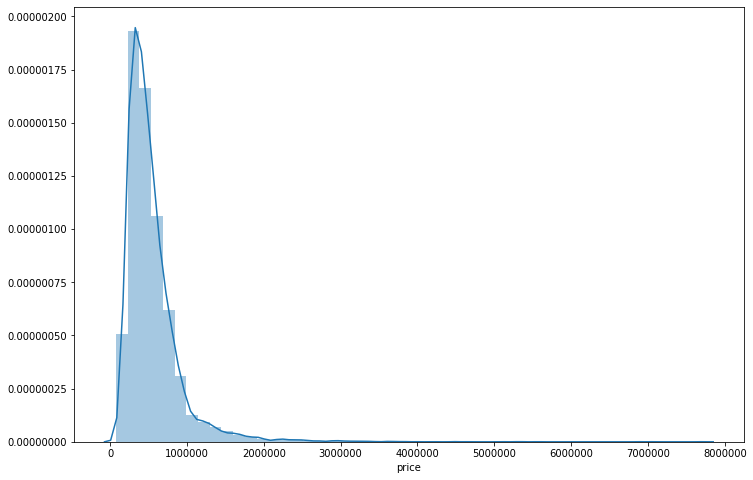

In [45]:
#sns.distplot(df['column_name']) -> histogram
plt.figure(figsize=(12,8))
sns.distplot(df['price'])  

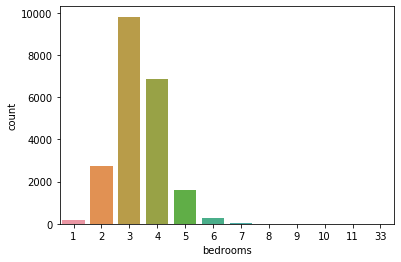

In [46]:
#sns.countplot(df['column_name']) # frequency of df column
sns.countplot(df['bedrooms'])

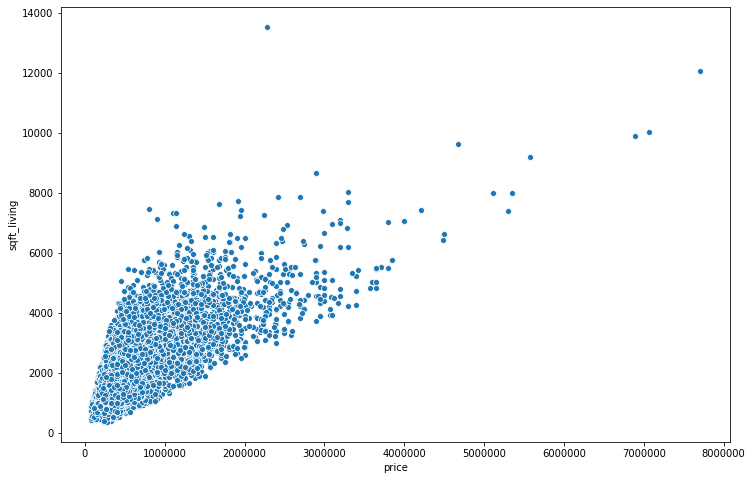

In [47]:
#sns.scatterplot(x='column_name1',y='column_name2', df)
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)
# sns.scatterplot(x='sqft_living',y='price',data=df)

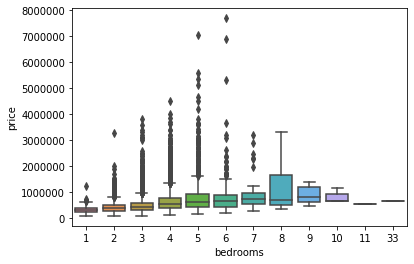

In [48]:
#sns.boxplot(x='column_name1', y='column_name2',data=df)
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

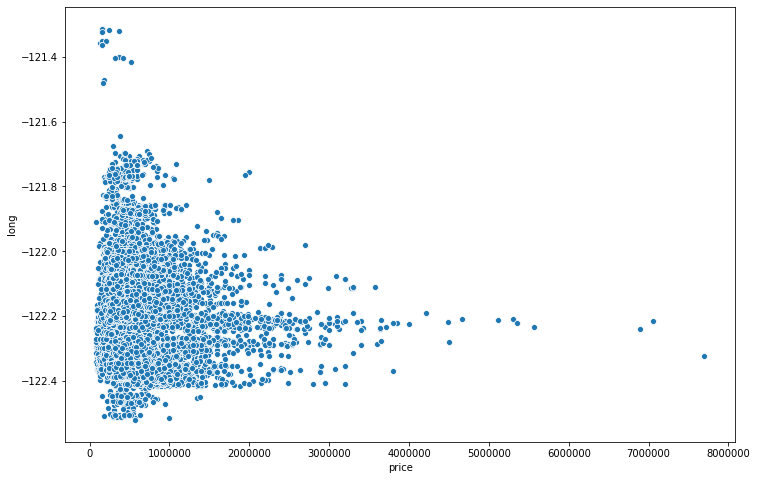

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

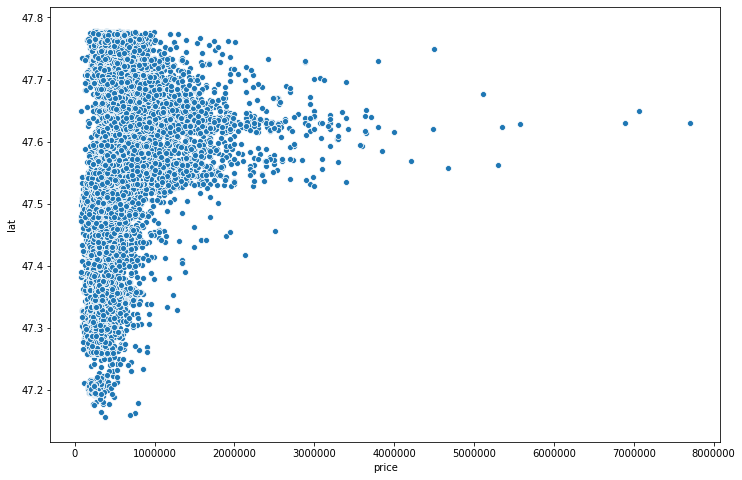

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

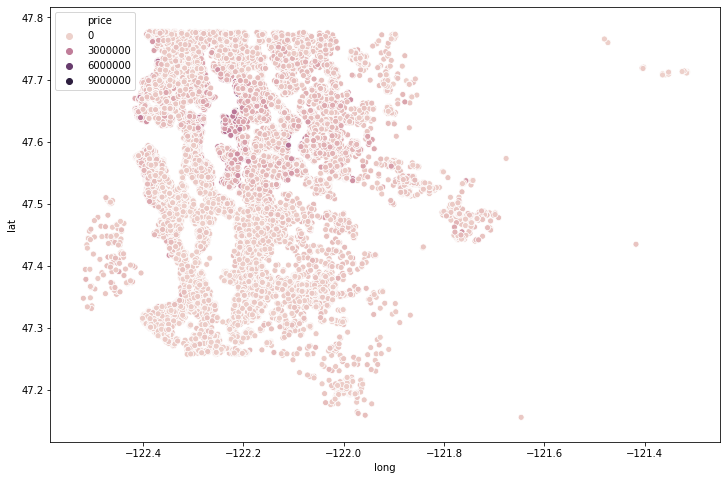

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [52]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [53]:
print(df.shape)
len(df)

(21597, 21)


21597

In [54]:
len(df)*(0.01)  #below top 10%  from top price. (ascending= False => descending.)

215.97

In [55]:
df.sort_values('price',ascending=False).iloc[:216] #upper 10%

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19513,1651500040,8/1/2014,1980000.0,4,4.00,4360,12081,2.0,0,0,...,10,4360,0,2007,0,98004,47.6377,-122.219,2180,10800
7408,5017000470,7/10/2014,1980000.0,6,4.50,4800,9097,2.0,0,0,...,10,3580,1220,2007,0,98112,47.6259,-122.291,2180,6037
16511,2025059026,2/25/2015,1980000.0,4,3.50,4500,44384,1.0,0,0,...,12,3340,1160,1990,0,98004,47.6323,-122.192,2540,26287
3278,8964800025,2/26/2015,1970000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320


In [56]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] # #below top 10%  from top price. (ascending= False => descending.)
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [57]:
df.sort_values('price',ascending=False).iloc[216:226] # iloc: not default index but actual sequence number 216 to 226

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
15363,1568100920,4/8/2015,1950000.0,4,2.50,3440,14554,2.0,1,4,...,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
16238,3760500280,10/14/2014,1950000.0,3,2.50,2510,12779,1.5,0,4,...,10,2510,0,1968,0,98034,47.6982,-122.231,2810,12225
18860,4389201241,12/30/2014,1950000.0,4,4.00,4690,6900,2.0,0,0,...,11,3480,1210,2001,0,98004,47.6165,-122.216,2800,11240
19336,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0,0,...,10,4065,0,1987,0,98039,47.6209,-122.237,3070,18713
14241,2425049107,3/5/2015,1950000.0,4,3.75,4150,17424,1.0,0,0,...,9,3130,1020,1963,2000,98039,47.6390,-122.236,3930,21420


In [58]:
df.sort_values('sqft_living',ascending=False).loc[5000:10000] # loc: show until default index 10000-> meaningless!!

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5000,1561930020,5/22/2014,430000.0,4,3.00,3220,8936,2.0,0,0,...,9,2450,770,1990,0,98031,47.4208,-122.213,2810,10500
21298,1441000470,7/28/2014,458000.0,4,3.50,3217,4000,2.0,0,0,...,8,2587,630,2008,0,98055,47.4483,-122.203,2996,5418
20285,1085623730,11/29/2014,498445.0,4,2.50,3216,5902,2.0,0,0,...,9,3216,0,2014,0,98030,47.3425,-122.179,2815,4916
15071,3444120130,3/27/2015,399950.0,4,2.75,3210,41689,1.0,0,0,...,8,1610,1600,1989,0,98042,47.3493,-122.062,2100,41384
21343,1853080130,11/5/2014,924000.0,5,2.75,3210,8001,2.0,0,0,...,9,3210,0,2014,0,98074,47.5935,-122.061,3190,6624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1785400780,4/15/2015,550000.0,3,2.25,2120,18255,1.0,0,0,...,8,1590,530,1984,0,98074,47.6279,-122.037,2120,12997
1894,9512000140,5/5/2014,755000.0,4,2.50,2120,10202,1.0,0,0,...,7,1620,500,1960,0,98005,47.5858,-122.170,1570,10762
10427,8079100140,7/28/2014,690000.0,4,2.50,2120,8448,2.0,0,0,...,9,2120,0,1989,0,98029,47.5654,-122.010,2140,8122
5248,4441300440,5/12/2014,582000.0,4,1.75,2120,4650,1.0,0,1,...,7,1190,930,1951,0,98117,47.6964,-122.400,2070,6487


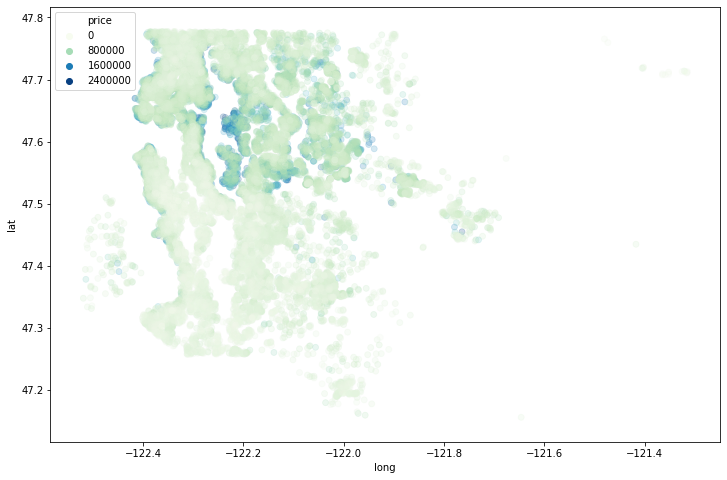

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
#                 palette='RdYlGn',edgecolor=None,alpha=0.2)
#               palette='YlGnBu',edgecolor=None,alpha=0.2)                
              palette='GnBu',edgecolor=None,alpha=0.2)

### Other Features

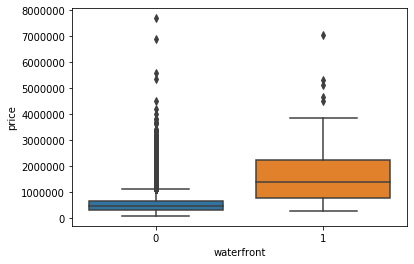

In [60]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [61]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [63]:
df = df.drop('id',axis=1)

In [64]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [65]:
#pd.to_datetime(df['date']) 
df['date'] = pd.to_datetime(df['date'])

In [66]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [67]:
df['date'].apply(lambda date:date.month)

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21597, dtype: int64

In [68]:
def return_month(input_date):
    return input_date.month
df['date'].apply(return_month)

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21597, dtype: int64

In [69]:
def return_weekday(input_date):
    return input_date.weekday() #0:mon, 1:tue, 2:wed -> weekday(): convert to mon, tue, wed, ...
weekd_df = df['date'].apply(return_weekday) #'Timestamp' object
print(type(weekd_df))

weekd_df = pd.DataFrame(weekd_df)
weekd_df

<class 'pandas.core.series.Series'>


,date
0,0
1,1
2,2
3,1
4,2
...,...
21592,2
21593,0
21594,0
21595,4


In [70]:
weekd_df.rename(columns ={'date':'weekday'}, inplace = True)
weekd_df

,weekday
0,0
1,1
2,2
3,1
4,2
...,...
21592,2
21593,0
21594,0
21595,4


In [71]:
def convert_weekday(argument):
    switcher = {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thirsday",
        5: "Friday",
        6: "Saturday"       
    }
    day = switcher.get(argument)
#     day = switcher(argument)
    return day

print(convert_weekday(1))    
weekd_df['weekday'].apply(convert_weekday)

Monday


0          Sunday
1          Monday
2         Tuesday
3          Monday
4         Tuesday
           ...   
21592     Tuesday
21593      Sunday
21594      Sunday
21595    Thirsday
21596     Tuesday
Name: weekday, Length: 21597, dtype: object

In [72]:
df['weekday']= pd.DataFrame(weekd_df['weekday'].apply(convert_weekday))

In [73]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weekday
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Sunday
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Monday
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Tuesday
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Monday
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Tuesday


In [74]:
df['month'] = df['date'].apply(lambda date:date.month)

In [75]:
df['year'] = df['date'].apply(lambda date:date.year)

In [76]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weekday,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,Sunday,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,Monday,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,Tuesday,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,Monday,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,Tuesday,2,2015


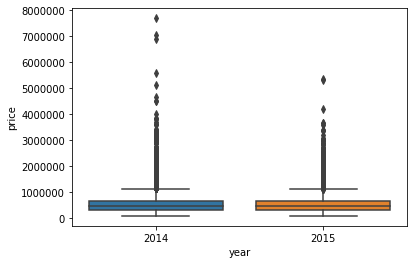

In [77]:
sns.boxplot(x='year',y='price',data=df)

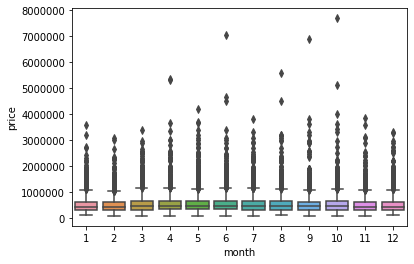

In [78]:
sns.boxplot(x='month',y='price',data=df)

In [79]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weekday,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,Sunday,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,Monday,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,Tuesday,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,Monday,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,Tuesday,2,2015


In [80]:
#remove weekday column to be original df
df=df.drop('weekday', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [81]:
df.groupby('bedrooms').mean().head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
bedrooms,,,,,,,,,,,,,,,,,,,,
1,318239.459184,1.082908,888.153061,16070.035714,1.153061,0.025510,0.250000,3.270408,6.127551,826.469388,61.683673,1942.479592,172.234694,98104.387755,47.568512,-122.262776,1452.163265,14025.933673,6.892857,2014.306122
2,401387.747101,1.401721,1239.752899,12096.726087,1.306703,0.011232,0.178623,3.377899,6.871739,1107.240942,132.511957,1955.413043,81.382609,98105.953623,47.588601,-122.278570,1503.785507,9693.109058,6.593116,2014.331884
3,466276.590900,1.968394,1805.837235,14414.790208,1.449410,0.006515,0.187805,3.415513,7.472516,1584.442284,221.394951,1971.812602,76.001425,98076.478217,47.551478,-122.213344,1835.443506,12809.343648,6.549267,2014.326954
4,635564.677129,2.436428,2554.649666,16720.793374,1.616100,0.005812,0.268091,3.406568,8.116681,2198.300639,356.349026,1976.594740,87.112467,98069.749201,47.556118,-122.189139,2291.124818,13727.256030,6.595176,2014.313572
5,786874.126171,2.778576,3047.545284,16769.022486,1.579638,0.011868,0.409744,3.449094,8.272330,2407.566521,639.978763,1974.204872,101.061836,98070.188007,47.574169,-122.201242,2442.706433,13089.471580,6.589631,2014.324797


In [82]:
df.groupby('bedrooms').mean()['price']

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

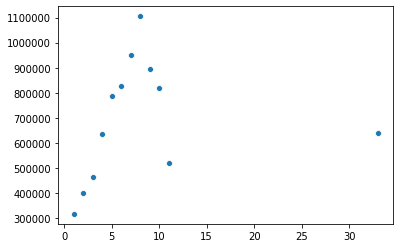

In [83]:
sns.scatterplot(data=df.groupby('bedrooms').mean()['price'])

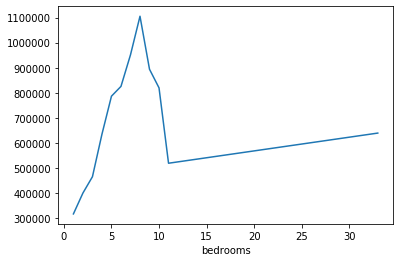

In [84]:
df.groupby('bedrooms').mean()['price'].plot()
#plt.plot(df.groupby('bedrooms').mean()['price'])

In [85]:
bedroom_price = df.groupby('bedrooms').mean()['price']
print(bedroom_price.shape)

(12,)


In [86]:
df.groupby('month').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,,,
1,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585,2015.000000
2,508520.051323,3.347233,2.062550,2012.901363,13694.825180,1.466319,0.004812,0.242181,3.405774,7.558140,1727.935846,284.965517,1971.418605,51.178027,98076.716119,47.546850,-122.216140,1944.269447,11595.312751,2015.000000
3,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,98077.578667,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
4,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,0.008524,0.230597,3.358905,7.651413,1777.883804,282.860027,1971.731270,70.733961,98078.967250,47.560614,-122.213484,1986.577389,12653.579632,2015.000000
5,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,1970.216653,105.121375,98079.094863,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
6,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,0.008724,0.241047,3.460514,7.736915,1820.423324,310.740588,1970.723600,80.617080,98079.596419,47.565513,-122.214423,2033.827824,12835.893939,2014.000000
7,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
8,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,0.006189,0.223311,3.440433,7.685921,1798.394533,286.706034,1972.044353,78.234141,98077.033522,47.564750,-122.209769,1995.968025,12966.646209,2014.000000
9,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,0.008470,0.249012,3.431959,7.644833,1786.968379,292.351214,1970.534161,99.215697,98078.513834,47.560654,-122.213067,1983.068888,11887.396951,2014.000000


In [87]:
print(type(df.groupby('month').mean()['price'])) #pd Series
df.groupby('month').mean()['price']

<class 'pandas.core.series.Series'>


month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

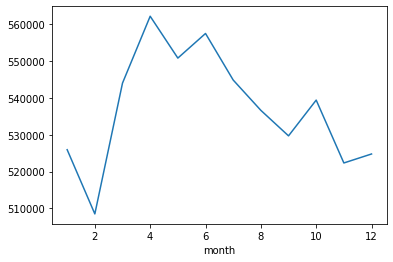

In [88]:
df.groupby('month').mean()['price'].plot()

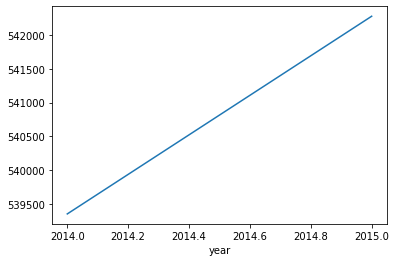

In [90]:
df.groupby('year').mean()['price'].plot()

In [95]:
df.groupby('year').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
year,,,,,,,,,,,,,,,,,,,,
2014,539350.911777,3.379565,2.129941,2098.719395,14938.448502,1.502428,0.007796,0.233621,3.430447,7.682738,1802.192655,296.526741,1970.927165,91.047326,98077.904185,47.562868,-122.214011,1996.818288,12755.223225,8.257078
2015,542279.005878,3.359857,2.086237,2041.754265,15436.836846,1.476631,0.007025,0.235699,3.366595,7.605878,1760.095341,281.658925,1971.151685,70.665520,98078.051756,47.554275,-122.213922,1965.241864,12764.698925,3.045591


In [96]:
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

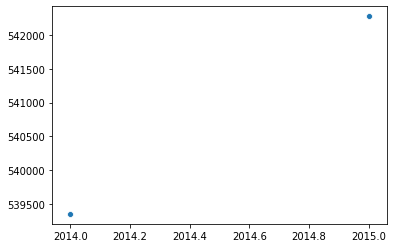

In [92]:
sns.scatterplot(data=df.groupby('year').mean()['price'])

In [58]:
df = df.drop('date',axis=1)

In [59]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [60]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [61]:
df = df.drop('zipcode',axis=1)

In [62]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [63]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [64]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [65]:
X = df.drop('price',axis=1)
y = df['price']

In [66]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [67]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [70]:
print(X_train.shape, type(X_train))
X_train.head()

(15117, 19) <class 'pandas.core.frame.DataFrame'>


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
7452,4,1.00,2290,6300,1.5,0,4,4,7,2150,140,1921,0,47.5917,-122.290,2390,6300,9,2014
20546,3,2.25,1630,2520,2.0,0,0,3,7,1630,0,2005,0,47.5493,-121.998,1630,3131,6,2014
21555,4,3.50,2850,5577,2.0,0,0,3,8,1950,900,2014,0,47.5252,-122.192,2850,5708,5,2015
9795,3,1.75,1540,6632,1.0,0,0,3,7,1070,470,1959,0,47.4973,-122.252,2510,6618,2,2015
12625,4,2.25,2010,7200,1.0,0,1,4,8,1010,1000,1950,0,47.5591,-122.267,2010,7200,10,2014


In [71]:
print(y_train.shape, type(y_train))
y_train.head()

(15117,) <class 'pandas.core.series.Series'>


7452     825000.0
20546    475000.0
21555    608500.0
9795     284200.0
12625    800000.0
Name: price, dtype: float64

### Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_train= scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

In [76]:
X_train.shape

(15117, 19)

In [77]:
X_test.shape

(6480, 19)

## Creating a Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [79]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
# import numpy as np
# X_train= np.asarray(X_train) 
# y_train= np.asarray(y_train)

In [80]:
type(y_train.values)

numpy.ndarray

In [81]:
type(y_train)

pandas.core.series.Series

## Training the Model

In [82]:
## measure the time. 
from functools import wraps
from time import time

def speed_test(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        t1 = time()
        result = fn(*args, **kwargs)
        t2 = time()
        print(f"Time Elapsed: {t2 - t1} seconds.")
        return result
    return wrapper

@speed_test
def model_fit():
    return model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

print(model_fit())
    

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 96us/sample - loss: 430244540281.8781 - val_loss: 418937886441.8765
Epoch 2/400
15117/15117 [==============================] - 0s 31us/sample - loss: 429167982087.6205 - val_loss: 414889941482.5087
Epoch 3/400
15117/15117 [==============================] - 0s 33us/sample - loss: 411801125252.0050 - val_loss: 374538064751.8815
Epoch 4/400
15117/15117 [==============================] - 1s 33us/sample - loss: 326512060779.4838 - val_loss: 240420505776.9876
Epoch 5/400
15117/15117 [==============================] - 0s 31us/sample - loss: 171657826107.2879 - val_loss: 109049799717.9259
Epoch 6/400
15117/15117 [==============================] - 0s 33us/sample - loss: 102429860604.6300 - val_loss: 95156840746.3506
Epoch 7/400
15117/15117 [==============================] - 1s 34us/sample - loss: 97499737470.6537 - val_loss: 93643806583.4667
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 1s 34us/sample - loss: 33034232038.0393 - val_loss: 31539608259.9506
Epoch 128/400
15117/15117 [==============================] - 1s 34us/sample - loss: 33012798632.6006 - val_loss: 31513888085.3333
Epoch 129/400
15117/15117 [==============================] - 1s 33us/sample - loss: 32989735807.9069 - val_loss: 31501710606.5383
Epoch 130/400
15117/15117 [==============================] - 1s 34us/sample - loss: 32938077085.8472 - val_loss: 31450012042.4296
Epoch 131/400
15117/15117 [==============================] - 1s 36us/sample - loss: 32898054571.6997 - val_loss: 31393755768.0988
Epoch 132/400
15117/15117 [==============================] - 1s 35us/sample - loss: 32886634587.5822 - val_loss: 31363222181.6099
Epoch 133/400
15117/15117 [==============================] - 1s 35us/sample - loss: 32880627758.2653 - val_loss: 31306194569.7975
Epoch 134/400
15117/15117 [==============================] - 1s 34us/sample - loss: 32816603426.3264 - v

15117/15117 [==============================] - 1s 35us/sample - loss: 30614898143.2147 - val_loss: 28635903640.9679
Epoch 254/400
15117/15117 [==============================] - 1s 35us/sample - loss: 30602684467.3456 - val_loss: 28632166157.2741
Epoch 255/400
15117/15117 [==============================] - 1s 36us/sample - loss: 30639745640.9605 - val_loss: 28702009960.9284
Epoch 256/400
15117/15117 [==============================] - 1s 36us/sample - loss: 30582977647.3618 - val_loss: 28590575894.1235
Epoch 257/400
15117/15117 [==============================] - 1s 34us/sample - loss: 30582191532.7835 - val_loss: 28609815043.7926
Epoch 258/400
15117/15117 [==============================] - 1s 35us/sample - loss: 30578462207.2379 - val_loss: 28561344562.5679
Epoch 259/400
15117/15117 [==============================] - 1s 35us/sample - loss: 30549155832.7520 - val_loss: 28544040363.2988
Epoch 260/400
15117/15117 [==============================] - 1s 34us/sample - loss: 30527965634.2565 - v

15117/15117 [==============================] - 1s 35us/sample - loss: 29447667905.1897 - val_loss: 27101878868.7012
Epoch 380/400
15117/15117 [==============================] - 1s 34us/sample - loss: 29441767043.6833 - val_loss: 27113128330.4296
Epoch 381/400
15117/15117 [==============================] - 1s 35us/sample - loss: 29440745068.2119 - val_loss: 27108003410.1728
Epoch 382/400
15117/15117 [==============================] - 1s 35us/sample - loss: 29421025280.4064 - val_loss: 27026589321.7975
Epoch 383/400
15117/15117 [==============================] - 1s 35us/sample - loss: 29424664014.3139 - val_loss: 27028053894.6370
Epoch 384/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29398691065.4802 - val_loss: 27013415407.5654
Epoch 385/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29413059487.6084 - val_loss: 27050808282.0741
Epoch 386/400
15117/15117 [==============================] - 1s 34us/sample - loss: 29365845766.0456 - v

In [83]:
# model.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=400)

In [84]:
losses = pd.DataFrame(model.history.history)

* [loss function : method of evaluating how well your algorithm models your dataset.](https://algorithmia.com/blog/introduction-to-loss-functions) 
    * If your predictions are totally off, your loss function will output a higher number. 
    * If they’re pretty good, it’ll output a lower number. 
    *  As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.

our loss function will simply measure the absolute difference between our prediction and the actual value. In mathematical notation, it might look something like abs(y_predicted – y). 
* Here’s what some situations might look like if we were trying to predict how expensive the rent is in some NYC apartments:
![loss](loss.png)

1. MSE(Mean Square Error)
```
def MSE(y_predicted, y):
    squared_error = (y_predicted - y) ** 2
    sum_squared_error = np.sum(squared_error)
    mse = sum_squared_error / y.size
    return(mse)
```
2. Likelihood Loss: The function takes the predicted probability for each input example and multiplies them. 
    * For example, consider a model that outputs probabilities of [0.4, 0.6, 0.9, 0.1] for the ground truth labels of [0, 1, 1, 0]. The likelihood loss would be computed as (1-0.4=0.6) * (0.6) * (0.9) * (1-.01=0.9) = 0.2916. Since the model outputs probabilities for TRUE (or 1) only, when the ground truth label is 0 we take (1-p) as the probability. In other words, we multiply the model’s outputted probabilities together for the actual outcomes.
3. Log Loss (Cross Entropy Loss): actually exactly the same formula as the regular likelihood function, but with logarithms added in. 
    * ``-(y(log(p)) + (1-y)(log(1-p)))`` actual class is 1, the second half of the function disappears, and when the actual class is 0, the first half drops.
    * high penalty for actual class 1(true label 1), predict as small predict probality as almost 0 
        *  Predicting high probabilities for the wrong class makes enormous log loss
        *  $ -(\log{p})$ -> $\log{p}^{-1}$ -> $\log{\frac1p}$   
    
        *  so, y =1, p = $\frac{1}{1000}$  :  $ -(\log{p})$  -> $1 \log{\frac{1}{\frac{1}{1000}}}$ -> $\log{1000}$ #6.90
        
    ![logloss](logloss.png)
    

[math notation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
* ``$\sqrt{3x-1}+(1+x)^2$`` 
* $\sqrt{3x-1}+(1+x)^2$ 
* ``\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}``
* \begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}
* ``\begin{equation*}
1 +  \frac{q^2}{(1-q)}+\frac{q^6}{(1-q)(1-q^2)}+\cdots =
\prod_{j=0}^{\infty}\frac{1}{(1-q^{5j+2})(1-q^{5j+3})},
\quad\quad \text{for $|q|<1$}.
\end{equation*}``
*\begin{equation*}
1 +  \frac{q^2}{(1-q)}+\frac{q^6}{(1-q)(1-q^2)}+\cdots =
\prod_{j=0}^{\infty}\frac{1}{(1-q^{5j+2})(1-q^{5j+3})},
\quad\quad \text{for $|q|<1$}.
\end{equation*}

[mathjs cheatsheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)
* ``$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$``
* $\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$

In [85]:
#test
import math
math.log(1000)

6.907755278982137

### learning curve: a plot that shows time or experience on the x-axis and learning or improvement on the y-axis.
* The metric used to evaluate learning could be maximizing, meaning that better scores (larger numbers) indicate more learning. An example would be classification accuracy.

* It is more common to use a score that is minimizing, such as loss or error whereby better scores (smaller numbers) indicate more learning and a value of 0.0 indicates that the training dataset was learned perfectly and no mistakes were made.

#### There are three common dynamics that you are likely to observe in learning curves; they are:
1) Underfitting: referring a model that cannot learn the training dataset.
* An underfit model may also be identified by a training loss that is decreasing and continues to decrease at the end of the plot.
    * This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.
    * A plot of learning curves shows overfitting if:
        1. The plot of training loss continues to decrease with experience.
        2. The plot of validation loss decreases to a point and begins increasing again.
* Underfitting occurs when the model is not able to obtain a sufficiently low error value on the training set.
This is the only case where loss > validation_loss, but only slightly,

   **Example of Training Learning Curve Showing An Underfit Model That Does Not Have Sufficient Capacity**
   ![no learnig](underfit_no_learning.png)
   **Example of Training Learning Curve Showing an Underfit Model That Requires Further Training**
![Example of Training Learning Curve Showing an Underfit Model That Requires Further Training](underfit.png)


2) Overfitting : loss << validation_loss :  trained for too long. more capacity than is required for the problem
* model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.
This means that your model is fitting very nicely the training data but not at all the validation data, in other words it's not generalizing correctly to unseen data
* A plot of learning curves shows overfitting if:
    * The plot of training loss continues to decrease with experience.
    * The plot of validation loss decreases to a point and begins increasing again.
![over fitting](over.png)
3) Perfect fitting : loss == validation_loss
* A **good fit** is the goal of the learning algorithm and exists between an overfit and underfit model.
* A **good fit** is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.
* The plot of training loss decreases to a point of stability.
* The plot of validation loss decreases to a point of stability and has a small gap with the training loss.
![good fit](goodfit.png)


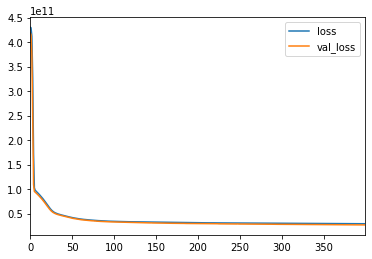

In [86]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [88]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [89]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6480, 1)


array([[406071.12],
       [598994.5 ],
       [577456.2 ],
       ...,
       [384493.1 ],
       [568510.75],
       [679584.8 ]], dtype=float32)

In [90]:
mean_absolute_error(y_test,predictions)

101608.36679566937

In [92]:
np.sqrt(mean_squared_error(y_test,predictions))

163860.24166088062

In [93]:
#  explained_variance_score: best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.7978374909005499

In [94]:
df['price'].mean()

540296.5735055795

In [95]:
df['price'].median()

450000.0

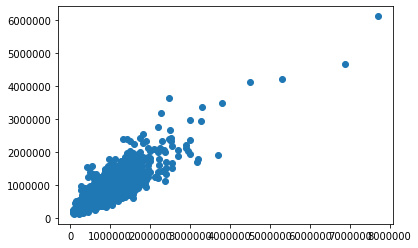

In [96]:
# Our predictions
plt.scatter(y_test,predictions)

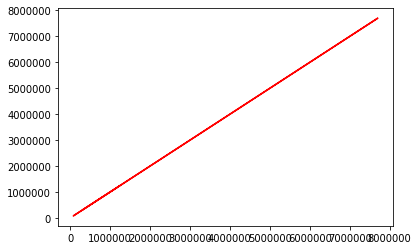

In [97]:
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [98]:
type(y_test)

pandas.core.series.Series

In [99]:
print(type(y_test.values))
y_test.values.shape

<class 'numpy.ndarray'>


(6480,)

In [100]:
predictions.shape

(6480, 1)

In [101]:
errors = y_test.values.reshape(6480, 1) - predictions
errors

array([[ -87071.125  ],
       [-134369.5    ],
       [ -87506.1875 ],
       ...,
       [  38006.90625],
       [-133510.75   ],
       [ 550415.1875 ]])

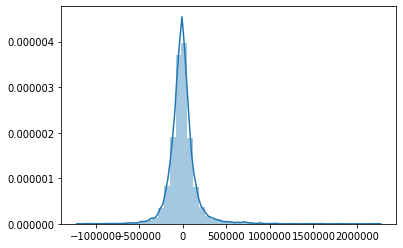

In [102]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [103]:
single_house = df.drop('price',axis=1).iloc[0]
print(single_house.shape)
single_house

(19,)


bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [104]:
single_house = scaler.transform(single_house.values.reshape(-1, 19)) #it's test data-> only tranform (not training data.)
single_house.shape

(1, 19)

In [105]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [106]:
model.predict(single_house)

array([[285897.97]], dtype=float32)

In [107]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64